In [1]:
import torch
import torchvision
from torchvision import transforms,models
from paths import *
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import cv2
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__) 
print(torchvision.__version__)

1.10.2
0.11.0a0+7ecba96


In [7]:
CLASSES=["Dog","Motorcycle", "Van", "Bus", "Bicycle", "Car","Person","Man", "Truck"]

In [8]:
my_faster_rcnn = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
num_classes = len(CLASSES)
in_features = my_faster_rcnn.roi_heads.box_predictor.cls_score.in_features
my_faster_rcnn.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [10]:
my_faster_rcnn.load_state_dict(torch.load(join(paths["MODEL_PATH"],"dict_pretrained_faster_rcnn.h"),map_location=device))
my_faster_rcnn.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): ConvNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): ConvNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block): Seque

In [13]:
dict_classes = { 0: 'Person',
                 1: 'Truck',
                 2: 'Van',
                 3: 'Car',
                 4: 'Bus',
                 5: 'Dog',
                 6: 'Bicycle',
                 7: 'Motorcycle',
                 8: "Person"}

In [35]:

def OD_images(path_file,classes_map):
    img=Image.open(path_file).convert('RGB')
    transform = transforms.Compose([transforms.ToTensor()])
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    results= my_faster_rcnn(batch_t)[0]
    boxes=results["boxes"].detach().numpy()
    pred_cls=results["labels"].detach().numpy()
    score_cls=results["scores"].detach().numpy()

    
    
    img = cv2.imread(path_file) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    
    for i in range(len(boxes)):
        if score_cls[i]>0.2:
      
            a=int(boxes[i][0])
            b=int(boxes[i][1])
            x = (int(boxes[i][0]), int(boxes[i][1]))
            y = (int(boxes[i][2]), int(boxes[i][3]))
            cv2.rectangle(img, x,y,(0, 255, 0),2) 
            cv2.putText(img, str(dict_classes[pred_cls[i]])+"-"+"%.2f" % score_cls[i], (a, b + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2, cv2.LINE_AA)
    
    return img
           

In [36]:
train_image_path=os.path.join(paths['IMAGE_PATH'],"test","data")

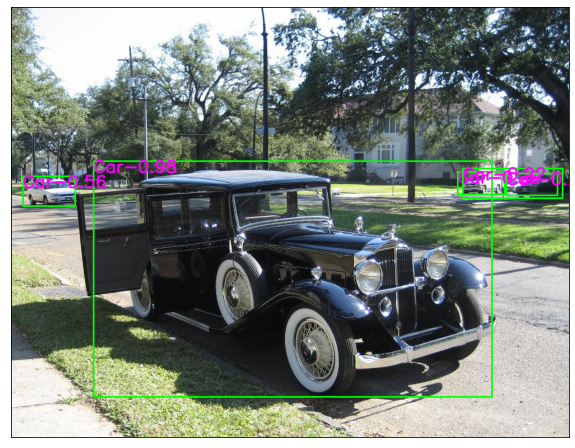

In [37]:
path_img =join(train_image_path,'00a9f1817594f581.jpg')
result=OD_images(path_img,dict_classes)
plt.figure(figsize=(10,10)) 
plt.imshow(result) 
plt.xticks([]) 
plt.yticks([]) 
plt.show()

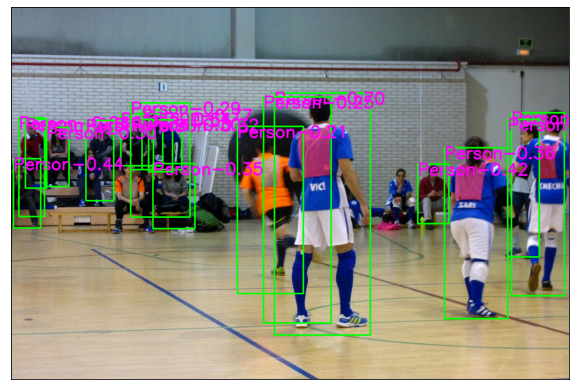

In [38]:
path_img2=join(train_image_path,'01537bd4806aea21.jpg')
result=OD_images(path_img2,dict_classes)
plt.figure(figsize=(10,10)) 
plt.imshow(result) 
plt.xticks([]) 
plt.yticks([]) 
plt.show()

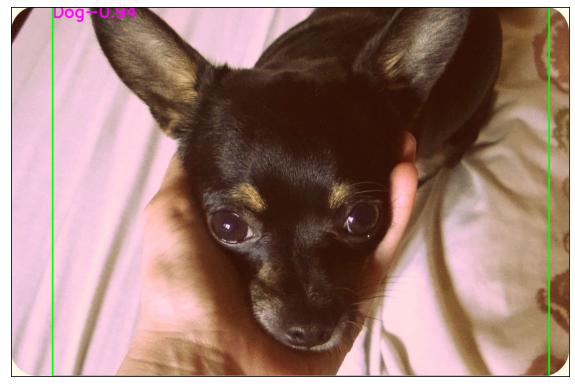

In [39]:
path_img2=join(train_image_path,'007a4d234b26981c.jpg')
result=OD_images(path_img2,dict_classes)
plt.figure(figsize=(10,10)) 
plt.imshow(result) 
plt.xticks([]) 
plt.yticks([]) 
plt.show()